In [5]:
import pandas as pd

iris = pd.read_csv('Iris_dataset.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [11]:
iris.rename(columns={
    '5.1': 'Sepal_Length',
    '3.5': 'Sepal_Width',
    '1.4': 'Petal_Length',
    '0.2': 'Petal_Width',
    'Iris-setosa': 'Species'
}, inplace=True)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


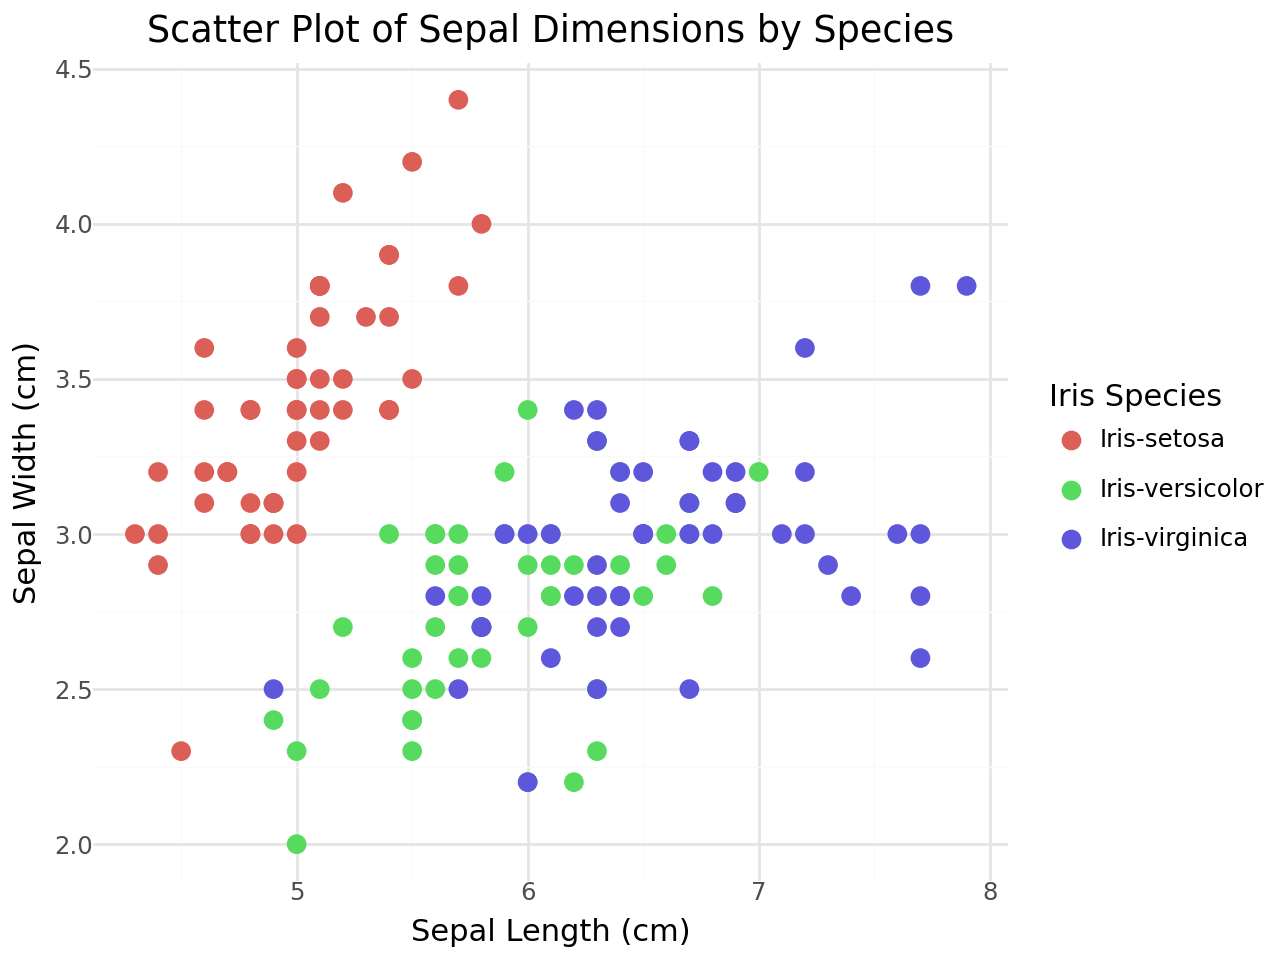

In [17]:
# Exercise 1: Creating a Scatter Plot with Aesthetic Mappings
import plotnine
from plotnine import ggplot, aes, geom_point, labs, theme_minimal
from IPython.display import display


plot = (
    ggplot(iris, aes(x='Sepal_Length', y='Sepal_Width', color='Species')) +
    geom_point(size=3) +
    labs(
        title='Scatter Plot of Sepal Dimensions by Species',
        x='Sepal Length (cm)',
        y='Sepal Width (cm)',
        color='Iris Species'
    ) +
    theme_minimal()
)

display(plot)

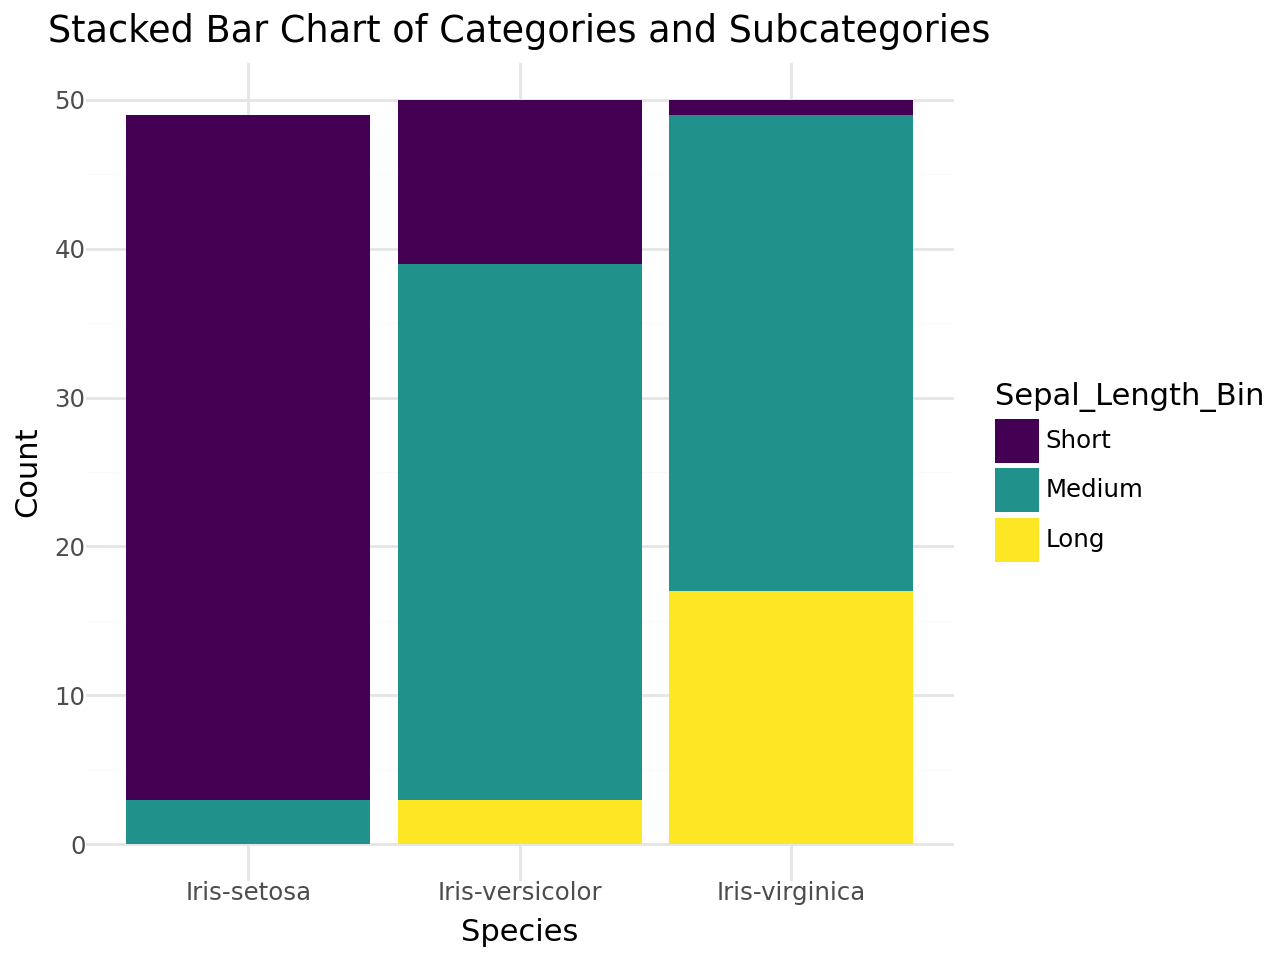

In [21]:
# Exercise 2: Building a Stacked Bar Chart
import plotnine
from plotnine import ggplot, aes, geom_bar, position_stack, labs, theme_minimal
from IPython.display import display

iris['Sepal_Length_Bin'] = pd.cut(iris['Sepal_Length'], bins=3, labels=['Short', 'Medium', 'Long'])


plot = (
    ggplot(iris, aes(x='Species', fill='Sepal_Length_Bin')) +
    geom_bar() +
    labs(
        title='Stacked Bar Chart of Categories and Subcategories',
        x='Species',
        y='Count',
        fill='Sepal_Length_Bin'
    ) +
    theme_minimal()
)

display(plot)

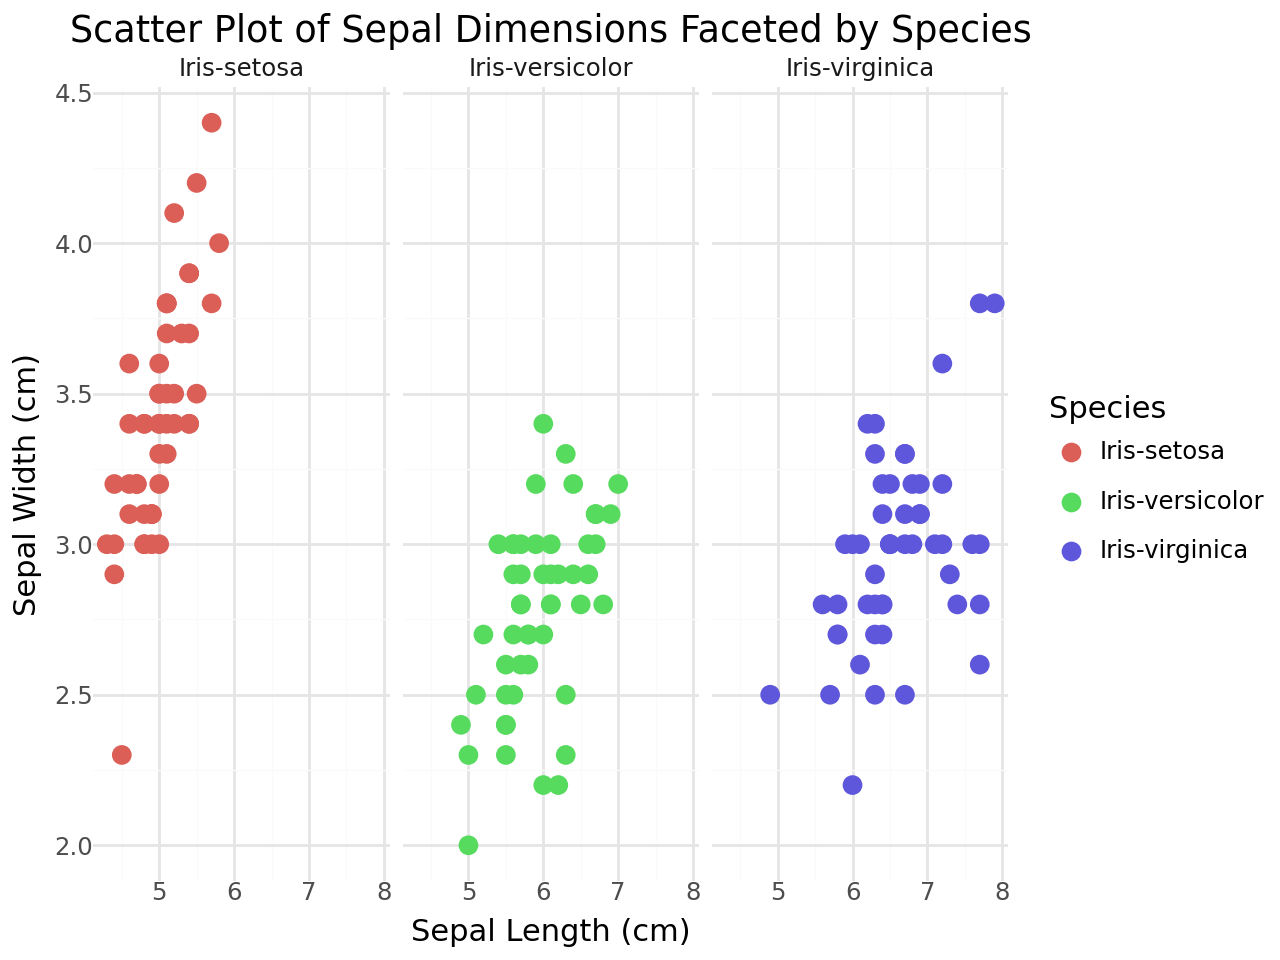

In [22]:
# Exercise 3: Exploring Facet Wrapping in Plotnine
import plotnine
from plotnine import ggplot, aes, geom_point, facet_wrap, labs, theme_minimal
from IPython.display import display

plot = (
    ggplot(iris, aes(x='Sepal_Length', y='Sepal_Width', color='Species')) +
    geom_point(size=3) +
    facet_wrap('~Species') +
    labs(
        title='Scatter Plot of Sepal Dimensions Faceted by Species',
        x='Sepal Length (cm)',
        y='Sepal Width (cm)',
        color='Species'
    ) +
    theme_minimal()
)

display(plot)

In [25]:
!unzip archive.zip

Archive:  archive.zip
  inflating: gapminder_data_graphs.csv  


In [27]:
import pandas as pd
gapminder = pd.read_csv('gapminder_data_graphs.csv')
gapminder.head()

,country,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Afghanistan,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Afghanistan,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Afghanistan,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Afghanistan,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Afghanistan,Asia,2002,55.5,0.384,0.0471,333.0,25.6


In [30]:
# Exercise 4: Interactive Line Chart with the Gapminder Dataset
import plotly.express as px

country = "Israel"
country_data = gapminder[gapminder['country'] == country]

fig = px.line(
    country_data,
    x='year',
    y='gdp',
    title=f'GDP per Capita Over Time for {country}',
    labels={'year': 'Year', 'gdp': 'GDP per Capita'},
    hover_data={'gdp': ':,.2f'}
)

fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    hovermode='x unified'
)

fig.show()

In [32]:
# Exercise 5: 3D Scatter Plot with the Iris Dataset
import plotly.express as px

fig = px.scatter_3d(
    iris,
    x='Sepal_Length',
    y='Sepal_Width',
    z='Petal_Length',
    color='Species',
    title="3D Scatter Plot of Iris Species",
    labels={'Sepal_Length': 'Sepal Length (cm)',
            'Sepal_Width': 'Sepal Width (cm)',
            'Petal_Length': 'Petal Length (cm)',
            'Species': 'Iris Species'},
    hover_data={'Species': True}
)

fig.update_layout(
    scene=dict(
        xaxis_title='Sepal Length (cm)',
        yaxis_title='Sepal Width (cm)',
        zaxis_title='Petal Length (cm)'
    ),
    title="3D Scatter Plot of Iris Species"
)

fig.show()

In [37]:
!unzip archive\ \(1\).zip

Archive:  archive (1).zip
replace Airlines.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Airlines.csv            


In [39]:
# Exercise 6: Interactive Heatmap using Flight Data
import pandas as pd

airlines = pd.read_csv('Airlines.csv')
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [51]:
import plotly.graph_objects as go

flight_counts = airlines.groupby(['AirportFrom', 'AirportTo']).size().reset_index(name='Flight Frequency')

heatmap_data = flight_counts.pivot_table(index='AirportTo', columns='AirportFrom', values='Flight Frequency', fill_value=0)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlGnBu',
    hovertext=heatmap_data.values,
    hovertemplate='Flights: %{hovertext}',
))

fig.update_layout(
    title='Flight Frequency Between US Airports',
    xaxis_title='Departure Airport',
    yaxis_title='Arrival Airport',
    xaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.columns)))),
    yaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.index)))),
    hovermode='closest',
    template='ggplot2'
)

fig.show()

In [43]:
# Exercise 7: Visualizing Large Time-Series Data with Matplotlib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbol = "^GSPC"
start_date = "2014-01-01"
end_date = "2024-01-01"
sp500_data = yf.download(symbol, start=start_date, end=end_date)

print(sp500_data.head())

[*********************100%***********************]  1 of 1 completed

Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2014-01-02 00:00:00+00:00  1831.979980  1831.979980  1845.859985  1827.739990   
2014-01-03 00:00:00+00:00  1831.369995  1831.369995  1838.239990  1829.130005   
2014-01-06 00:00:00+00:00  1826.770020  1826.770020  1837.160034  1823.729980   
2014-01-07 00:00:00+00:00  1837.880005  1837.880005  1840.099976  1828.709961   
2014-01-08 00:00:00+00:00  1837.489990  1837.489990  1840.020020  1831.400024   

Price                             Open      Volume  
Ticker                           ^GSPC       ^GSPC  
Date                                                
2014-01-02 00:00:00+00:00  1845.859985  3080600000  
2014-01-03 00:00:00+00:00  1833.209961  2774270000  
2014-01-06 00:00:00+00:00  1832.310059  3294850000  
2014-01-07 00:00:00+00:00  1828.7

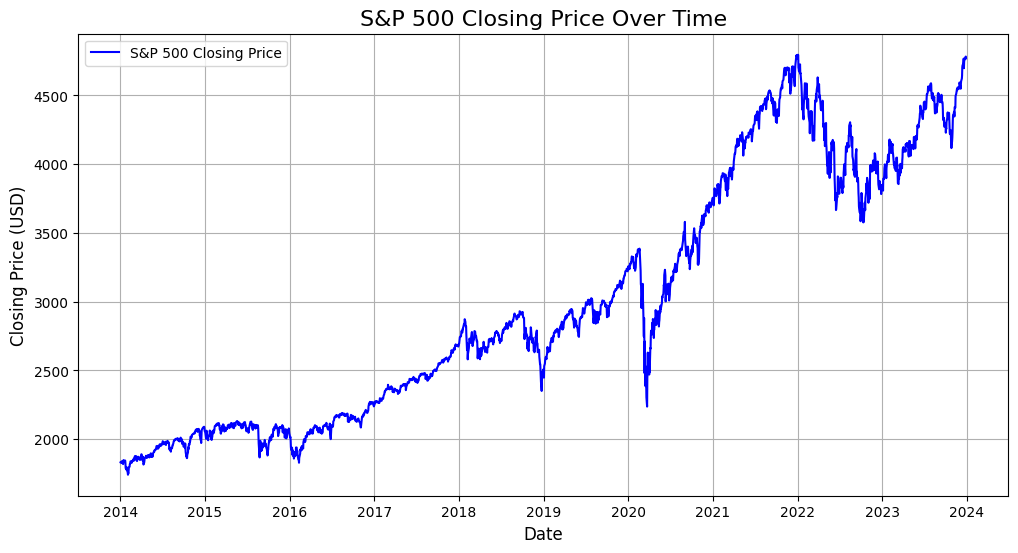

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['Close'], label="S&P 500 Closing Price", color="blue")

plt.title('S&P 500 Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()

In [45]:
# Exercise 8: Interactive Data Exploration with Plotly on Flight Delays Dataset
!unzip ot_delaycause1_DL.zip

Archive:  ot_delaycause1_DL.zip
  inflating: Airline_Delay_Cause.csv  
  inflating: Download_Column_Definitions.xlsx  


In [48]:
import pandas as pd

flight_delays = pd.read_csv('Airline_Delay_Cause.csv')
flight_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1888 non-null   int64  
 1   month                1888 non-null   int64  
 2   carrier              1888 non-null   object 
 3   carrier_name         1888 non-null   object 
 4   airport              1888 non-null   object 
 5   airport_name         1888 non-null   object 
 6   arr_flights          1888 non-null   float64
 7   arr_del15            1888 non-null   float64
 8   carrier_ct           1888 non-null   float64
 9   weather_ct           1888 non-null   float64
 10  nas_ct               1888 non-null   float64
 11  security_ct          1888 non-null   float64
 12  late_aircraft_ct     1888 non-null   float64
 13  arr_cancelled        1888 non-null   float64
 14  arr_diverted         1888 non-null   float64
 15  arr_delay            1888 non-null   f

In [50]:
import plotly.express as px

fig = px.scatter(
    flight_delays,
    x='month',
    y='arr_delay',
    color='carrier',
    hover_data={
        'carrier_name': True,
        'airport_name': True,
        'arr_delay': True,
        'year': True,
        'month': True
    },
    title="Flight Arrival Delay vs Month",
    labels={
        'month': 'Month of the Year',
        'arr_delay': 'Arrival Delay (Minutes)',
        'carrier': 'Airline Carrier'
    }
)

fig.update_layout(
    title="Flight Arrival Delay vs Month of the Year",
    xaxis_title="Month of the Year",
    yaxis_title="Arrival Delay (Minutes)",
    legend_title="Airline Carrier",
    template='ggplot2'
)

fig.show()